## Functions

Functions are the building blocks of our code. They are normally snippets that get called repeatedly, meaning that it would be tedious to repetively write out the same code over and over again. A function takes as input a set of arguments, performs a series of operations using the arguments, and then returns some object. However, most of these components are optional -- a function in Python doesn't necessarily need an argument, and it doesn't have to return anything either. The only requirements are a function definition, and some kind of action within the function's scope. For example, the following is a valid function that does nothing:

In [17]:
def i_do_nothing():
    pass

i_do_nothing()

We call a function as shown in line 4. More interesting functions will generally do something with the arguments that they are given. For example, the following is a function that returns the probability density of a variable from a normal distribution with a given mean and standard deviation:

In [35]:
from math import exp, sqrt, pi

def gaussian_probability_density(x, mu=0, sigma=1):
    return (1/sqrt(2*pi*sigma**2))*exp(-(x-mu)**2/2/sigma**2)

When we specify a value for an argument, we are giving it a default value. That is, we can call this function using either the default or a specific argument:

In [34]:
print("Using our own arguments:")
print(gaussian_probability_density(1, 0, 2))
print()
print("Using default arguments:")
print(gaussian_probability_density(1))

Using our own arguments:
0.17603266338214976

Using default arguments:
0.24197072451914337


When we use the default argument, we only need to provide a value for the arguments where the default isn't specified.

#### Nesting

Functions can be nested within one another where necessary:

In [1]:
def nested_function(x):
    def inner_function(x):
        return x**2
    return inner_function(x)**2
print("The nested function output is: ")
print(nested_function(2))

The nested function output is: 
16


Nesting can be useful in optimization tasks where you might have an inner cost function that a wider optimization function calls repeatedly. You could also split the two functions apart, but -- due to scoping, covered below -- the visibility of certain variables might become an issue.

#### Returns

Not all functions need to return anything:

In [9]:
def this_returns_nothing():
    print("I give you nothing!")
this_returns_nothing()

I give you nothing!


It depends on the program, but sometimes this can be useful for the organization of ideas.

For functions that do return, there are two philosophies on how your code should be organized. The first is that you should only ever have one return statement:

In [37]:
def single_return(x):
    if x < 0:
        var = "x is less than zero."
    elif x == 0:
        var = "x is equal to zero."
    elif x > 0:
        var = "x is greater than zero."
    return var

print(single_return(5))

x is greater than zero.


The second is that you should aim for conciseness and readability of code, even if this means having multiple return statements. For example:

In [38]:
def multi_return(x):
    if x < 0:
        return "x is less than zero"
    elif x == 0:
        return "x is equal to zero."
    elif x > 0:
        return "x is greater than zero."
    
print(multi_return(0))

x is equal to zero.


The second function is syntactically shorter (and in certain cases, will be significantly so), but this practice can lead to problems if return statements are buried in the middle of a large function. My advice would be to break your code into smaller chunks (don't have colossal functions where you can help it), and use multiple return statements to make your code more explicit. This will have the added advantage of being easier to debug.

Finally, we come to the topic of returning more than one value. This is straightforward -- in Python, we can return as many values as we like, and choose how we access them. For example:

In [45]:
import numpy as np
from math import log

def get_sample_and_logprob(mu, sigma):
    sample = mu+sigma*np.random.randn()
    log_prob = log(gaussian_probability_density(sample, mu, sigma))
    return sample, log_prob

print("We can grab all values if we know how many there are:")
x, lp = get_sample_and_logprob(0, 1)
print("x: {:.4f}, log probability: {:.4f}".format(x, lp))
print()
print("Or we can grab the outputs as a tuple:")
output = get_sample_and_logprob(0, 1)
print(output)
print(output[0])
print(output[1])

We can grab all values if we know how many there are:
x: -1.1286, log probability: -1.5558

Or we can grab the outputs as a tuple:
(-0.5974822505680031, -1.0974310530765758)
-0.5974822505680031
-1.0974310530765758


#### Variable Arguments and Keyworded Arguments


In the cases we've looked at previously, the number of input arguments has been fixed, but what if we don't know how many arguments there are? This is where \*args and \*\*kwargs come in handy. To demonstrate the idea, let's write a function that multiplies values together:

In [46]:
def multiply(a, b):
    return a*b

x, y = 3, 7
print("{} times {} is: {}".format(x, y, multiply(x,y)))

3 times 7 is: 21


Now, we'll try to pass this function 3 arguments and see what happens:

In [47]:
z = 6
multiply(x,y,z)

TypeError: multiply() takes 2 positional arguments but 3 were given

Hmmmmm that's a bit problematic. Let's modify this code to use a variable number of arguments instead:

In [49]:
def multiply(*args):
    z = 1
    for num in args:
        z *= num
    return z

print("{} times {} times {} is: {}".format(x, y, z, multiply(x,y,z)))

3 times 7 times 6 is: 126


Success! We can pass this function any number of values, and it will multiply them until our computer runs out of memory.

Keyworded arguments are similar, but the argument is indexed using a keyword. To give you an example:

In [50]:
def print_values(**kwargs):
    for key, value in kwargs.items():
        print("The value of {} is {}".format(key, value))

print_values(
            name_1="Alex",
            name_2="Gray",
            name_3="Harper",
            name_4="Phoenix",
            name_5="Remy",
            name_6="Val"
        )

The value of name_1 is Alex
The value of name_2 is Gray
The value of name_3 is Harper
The value of name_4 is Phoenix
The value of name_5 is Remy
The value of name_6 is Val


You might use this type of structure for navigating data contained in dictionaries, or writing tailored messages to a list of people.

### Scoping

An important component of programming is called scoping, or encapsulation. Essentially, it refers to what variables are observable at what levels of a program. For example:

In [12]:
temp = "outside" # this is a string variable called temp

def this_also_returns_nothing():
    temp = "inside"
    print(temp)

def and_for_my_next_trick():
    print(temp)
    
print(temp)
this_also_returns_nothing()
and_for_my_next_trick()

outside
inside
outside


The temp variable inside the function this_also_returns_nothing() takes priority over the temp variable defined outside the function. However, the function and_for_my_next_trick() has no variable named temp defined within its scope, and can see the temp variable defined outside the function.

### Lambda Functions

Lambda functions are one liners that can be used if a function is simple or short. For example:

In [18]:
square = lambda x : x**2
k = 5
print("The square of {} is {}".format(k, square(k)))

The square of 5 is 25


We can also nest lambda functions to produce more complex functionality:

In [19]:
fourth_order = lambda x : (lambda x : x**2)(x)**2
k = 2
print("{} to the fourth power is {}".format(k, fourth_order(k)))

2 to the fourth power is 16


Lambda functions are reasonably rare, but are useful for quickly testing concepts or generating dummy data. As an example:

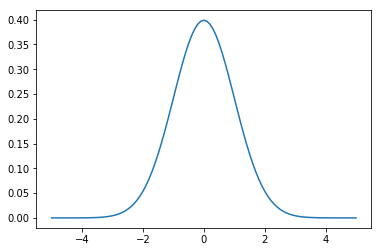

In [28]:
import matplotlib.pyplot as plt

gaussian_pdf = lambda x, mu, sigma : (1/sqrt(2*pi)/sigma)*exp(-(x-mu)**2/2/sigma**2)
xs = [i*0.1-5 for i in range(101)]
ys = [gaussian_pdf(x, 0, 1) for x in xs]
ax = plt.axes()
ax.plot(xs,ys)
plt.show()

It takes us only a few lines of code to plot out a normal distribution using a lambda function. In this case, roughly half the code is actually plotting the output -- the data itself only took 3 lines to generate. This is a fairly common strategy that you'll see later on when we move to numpy. Often we'll generate noisy dummy data in order to test an optimization routine, or a machine learning method. Lambda functions can significantly reduce the amount of code you need to write, as long as you're prudent in your usage of them (try to avoid hugely nested lambda functions, for example).